## 本内容是对kmer的内容进行深入的特征工程

In [1]:
# 导包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import os


In [2]:
# path
df_row_data_dir_path = os.path.abspath(os.path.dirname(os.path.dirname(os.getcwd())))

df_row_data_path1 = r'\new_data\kmer\train_1_meter.csv'
df_row_data_path2 = r'\new_data\kmer\train_2_meter.csv'
df_row_data_path3 = r'\new_data\kmer\train_3_meter.csv'
df_row_data_path4 = r'\new_data\kmer_gap\train3_gap_1_1_meter.csv'
df_row_data_path5 = r'\new_data\kmer_gap\train4_gap_1_1_meter.csv'
df_row_data_path6 = r'\new_data\kmer_gap\train4_gap_1_2_meter.csv'
df_row_data_path7 = r'\new_data\kmer_gap\train4_gap_2_1_meter.csv'


In [3]:
# 数据载入
df_data1 = pd.read_csv(df_row_data_dir_path+df_row_data_path1)
df_data2 = pd.read_csv(df_row_data_dir_path+df_row_data_path2).drop('label',axis = 1)
df_data3 = pd.read_csv(df_row_data_dir_path+df_row_data_path3).drop('label',axis = 1)
df_data4 = pd.read_csv(df_row_data_dir_path+df_row_data_path4).drop('label',axis = 1)
df_data5 = pd.read_csv(df_row_data_dir_path+df_row_data_path5).drop('label',axis = 1)
df_data6 = pd.read_csv(df_row_data_dir_path+df_row_data_path6).drop('label',axis = 1)
df_data7 = pd.read_csv(df_row_data_dir_path+df_row_data_path7).drop('label',axis = 1)

# 数据合并

In [4]:
# 将数据合并，前conmcat_num个数据合并
concat_num = 5
concat_list = [df_data1,df_data2,df_data3,df_data4,df_data5,df_data6,df_data7]
#concat_list = [df_data1,df_data2,df_data3, df_data3]

df_row_train = pd.concat(concat_list[:concat_num], axis = 1)

In [5]:
df_row_train.head()

,label,A,C,D,E,F,G,H,I,K,...,A*IG,W*KX,P*PR,S*FL,T*XF,E*UT,I*NY,P*AS,L*HE,R*KI
0,1,6,1,12,15,9,9,2,8,22,...,0,0,0,0,0,0,0,0,0,0
1,1,63,2,46,80,27,58,13,62,76,...,0,0,0,0,0,0,0,1,0,0
2,1,14,7,5,11,3,5,0,6,13,...,0,0,0,0,0,0,0,0,0,0
3,1,14,1,3,9,3,12,3,9,6,...,0,0,0,0,0,0,0,0,0,0
4,1,2,0,16,15,5,3,0,9,13,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_data_label = df_row_train.label
df_data_features = df_row_train.drop('label',axis = 1)

In [7]:
df_data_features.head()

,A,C,D,E,F,G,H,I,K,L,...,A*IG,W*KX,P*PR,S*FL,T*XF,E*UT,I*NY,P*AS,L*HE,R*KI
0,6,1,12,15,9,9,2,8,22,18,...,0,0,0,0,0,0,0,0,0,0
1,63,2,46,80,27,58,13,62,76,59,...,0,0,0,0,0,0,0,1,0,0
2,14,7,5,11,3,5,0,6,13,5,...,0,0,0,0,0,0,0,0,0,0
3,14,1,3,9,3,12,3,9,6,11,...,0,0,0,0,0,0,0,0,0,0
4,2,0,16,15,5,3,0,9,13,8,...,0,0,0,0,0,0,0,0,0,0


# 特征工程

In [8]:
from sklearn.feature_selection import VarianceThreshold, SelectPercentile
from sklearn.feature_selection import chi2

# 方差选择法，返回值为特征选择后的数据，参数threshold为方差的阈值

#selector = VarianceThreshold(threshold =5)
#new_data = selector.fit_transform(df_data_features)

selector = SelectPercentile(chi2,percentile=10)
new_data = selector.fit_transform(df_data_features, df_data_label)

new_data.shape

(1708, 2228)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [10]:
train_X,test_X,train_Y,test_Y=train_test_split(new_data,df_data_label, test_size=0.1, random_state=0)

## 2. Model Predict

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
test_Y.head()

1544    0
6       1
251     1
838     1
310     1
Name: label, dtype: int64

In [13]:
logistic_model = LogisticRegression()
logistic_model.fit(train_X,train_Y)
predict_Y = logistic_model.predict(test_X)
print('Accuracy for LogisticRegression is:{}'.format(metrics.accuracy_score(predict_Y,test_Y)))

Accuracy for LogisticRegression is:0.8830409356725146


In [14]:
from sklearn.svm import SVC

In [15]:
svc_model= SVC(kernel = 'rbf',C=10,gamma=0.1)
svc_model.fit(train_X,train_Y)
predict_SVC_Y = svc_model.predict(test_X)
print('Accuracy for SVC is:{}'.format(metrics.accuracy_score(predict_SVC_Y,test_Y)))

Accuracy for SVC is:0.5497076023391813


In [16]:
svc_linear_model = SVC(kernel='linear', C=0.1, gamma=0.1)
svc_linear_model.fit(train_X,train_Y)
predict_SVC_linear_Y = svc_linear_model.predict(test_X)
print('Accuracy for SVC_linear is:{}'.format(metrics.accuracy_score(predict_SVC_linear_Y, test_Y)))

Accuracy for SVC_linear is:0.8654970760233918


In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn_model = KNeighborsClassifier()
knn_model.fit(train_X,train_Y)
predict_knn_Y = knn_model.predict(test_X)
print('Accuracy for knn is: {}'.format(metrics.accuracy_score(predict_knn_Y,test_Y)))

Accuracy for knn is: 0.8713450292397661


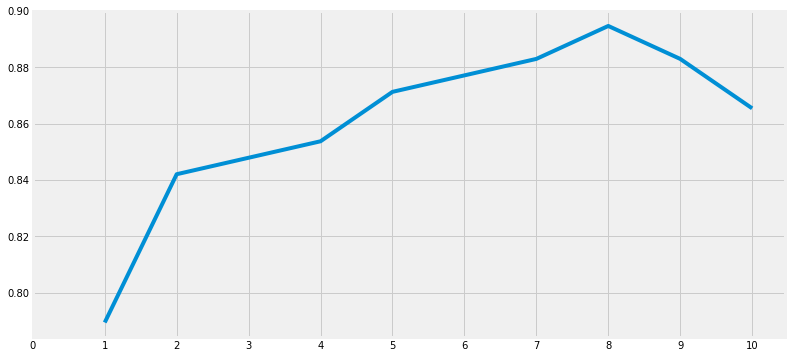

Accuracies for different values of n are: [0.78947368 0.84210526 0.84795322 0.85380117 0.87134503 0.87719298
 0.88304094 0.89473684 0.88304094 0.86549708] with the max value as  0.8947368421052632


In [19]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
decisionTree_model = DecisionTreeClassifier()
decisionTree_model.fit(train_X,train_Y)
predict_decisionTree_Y = decisionTree_model.predict(test_X)
print('Accuracy for DecisionTree is:{}'.format(metrics.accuracy_score(predict_decisionTree_Y,test_Y)))

Accuracy for DecisionTree is:0.8128654970760234


In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
gaussianNB_model = GaussianNB()
gaussianNB_model.fit(train_X,train_Y)
predict_gaussianNB_Y = gaussianNB_model.predict(test_X)
print('Accuracy for GaussianNB is:{}'.format(metrics.accuracy_score(predict_gaussianNB_Y, test_Y)))

Accuracy for GaussianNB is:0.8011695906432749


In [24]:
from sklearn.ensemble import RandomForestClassifier

d:\develop\pythom3_7_0\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [25]:
rf_model = RandomForestClassifier()
rf_model.fit(train_X,train_Y)
predict_rf = rf_model.predict(test_X)
print('Accuracy for DecisionTree is:{}'.format(metrics.accuracy_score(predict_rf, test_Y)))

Accuracy for DecisionTree is:0.7660818713450293


In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[SVC(kernel='linear'),SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=10),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,train_X,train_Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2